In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [0]:
img = cv2.imread('sen.png')

In [0]:
h, w, c = img.shape

In [0]:
import random

In [0]:
def plus_noise(img, noise_ratio):
  img_noise = img.copy()
  ratio = int(h* w * c * noise_ratio)
  for i in range(0, ratio):
    h_random = random.randint(0, h - 1) % h
    w_random = random.randint(0, w-1) % w
    c_random = random.randint(0, c - 1) % c
    select_random = random.randint(0, 1)
    if select_random == 0:
      img_noise[h_random, w_random, c_random] = 0
    else:
      img_noise[h_random, w_random, c_random] = 255
  return img_noise




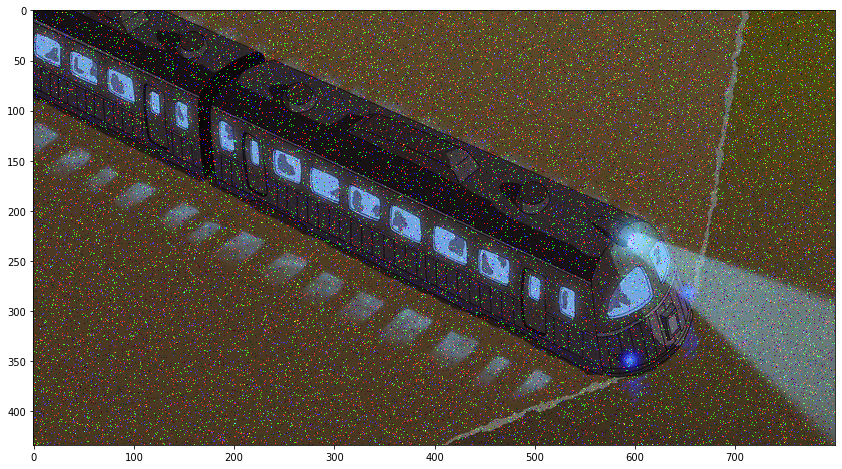

In [0]:
img_noise = plus_noise(img, 0.05)
plt.figure(figsize=(16,8))
plt.imshow(img_noise)

In [0]:
plt.figure(figsize=(16,8))
plt.imshow(img)

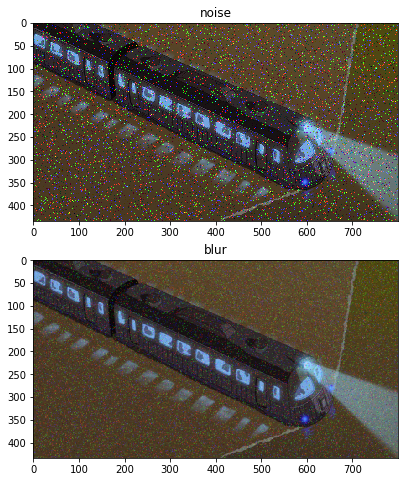

In [0]:
img_noise = plus_noise(img, 0.05)
noise_master = cv2.GaussianBlur(img_noise,(3,3),0)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('noise')
plt.imshow(img_noise)
plt.subplot(2,1,2)
plt.title('blur')
plt.imshow(noise_master)

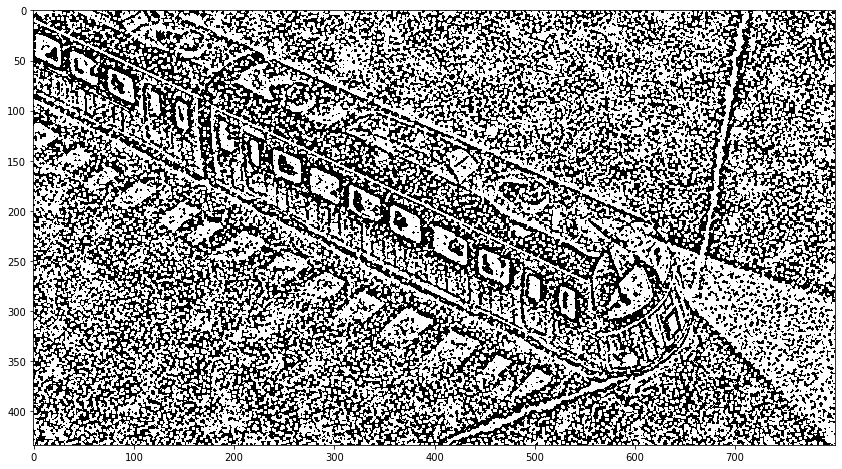

In [0]:
gray = cv2.cvtColor(noise_master, cv2.COLOR_BGR2GRAY)
img_thres = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 15, 3)
plt.figure(figsize=(16,8))
plt.imshow(img_thres, cmap='gray')